In [55]:
# Cargamos las librerias que podriamos ocupar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

In [56]:
# Cargamos los datos
data = pd.read_excel('Amazon.xlsx', sheet_name='Sheet1')
data.head()


,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43


In [57]:
# Prepararmos los datos
X = data.iloc[:, 1:].values  # Todas las columnas excepto los nombres, para que no las tome en cuenta y no genere error
names = data.iloc[:, 0].values  # Nombres de los clientes

# Estandarizamos los datos Equivalente a la normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


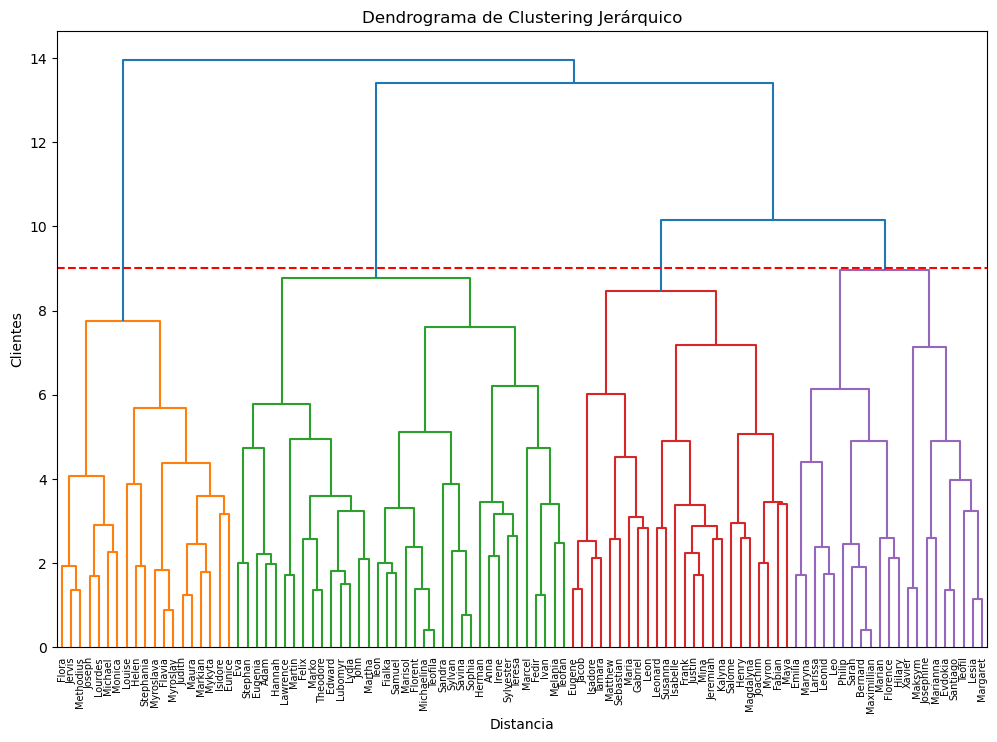

In [58]:
# Aplicamos clustering jerárquico
linked = linkage(X_scaled, method='ward')

# Visualizamos el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linked, labels=names, orientation='top', leaf_font_size=7)
plt.axhline(y=9, color = 'r', linestyle = '--')
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Distancia')
plt.ylabel('Clientes')
plt.show()


## En el Dendograma ya podemos determinar y resolver las preguntas que se plantean en nuestro ejercicio:
1. **¿qué productos recomendaría a Salomé?**  A Salomé le puedo recomendar los mismos productos que normalmente compra Henry o Magdalena ya que gráficamente son los más próximos
2. **¿Qué productos recomendaría a Stephanía?** A Stehania le podría recomendar los mismos productos que consume Helen, ya que gráficamente es la más cercana o similar, segín la gráfica
3. **¿Qué productos recomendaría a Lydia?**  A Lydia le recomendaría los mismos productos que compra Lubomyr porque es con quine tiene más similitud, según nuestra gráfica
    al

In [59]:
# Análisamos el gráfico con PCA
campos = X_scaled
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca.fit(campos)
campos = pca. transform(campos)

In [60]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
grupos = cluster.fit_predict (X_scaled)
grupos

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 3, 3, 1, 2, 3, 2, 0, 2,
       2, 2, 3, 3, 2, 0, 2, 3, 2, 0, 3, 1, 2, 1, 1, 3, 1, 2, 0, 0, 3, 1,
       1, 0, 2, 1, 1, 0, 0, 0, 3, 2, 2, 1, 0, 2, 0, 1, 0, 0, 3, 2, 2, 2,
       0, 1, 3, 1, 0, 2, 3, 3, 2, 1, 3, 3, 1, 3, 3, 1, 2, 2, 0, 2, 1, 2,
       2, 3, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2])

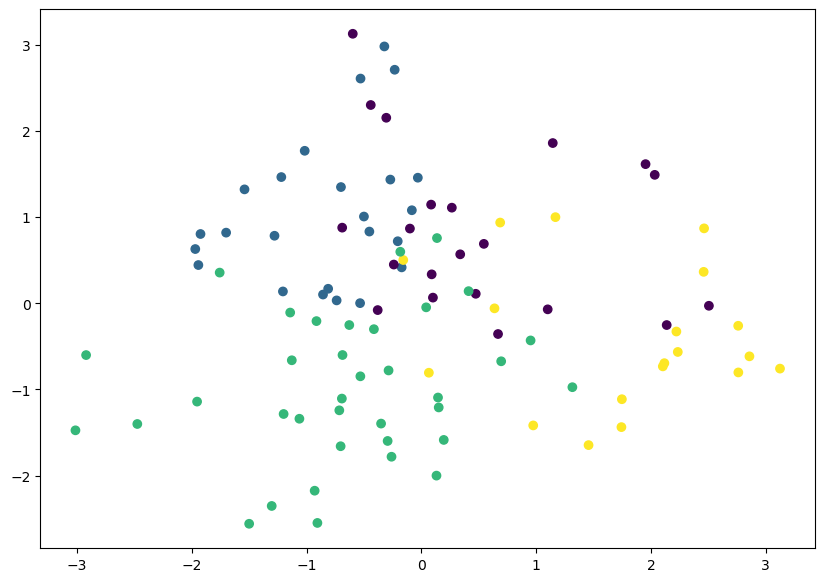

In [61]:
plt.figure(figsize=(10, 7))
plt.scatter(campos[:, 0], campos[: , 1], c=cluster. labels_)

In [62]:
# Lo simplificamos
dataframe = pd.DataFrame(grupos, columns=['grupo'])
dataframe

,grupo
0,2
1,2
2,0
3,2
4,0
5,1
6,0
7,1
8,0
9,1


In [63]:
# Para uirlo usamos concatenar y tenerlo todo visible en la misma gráfica para poder hacer la busqueda de las clientas específicas
dataframe2 = pd.concat([data,dataframe], axis=1, join='inner')
pd.options.display.max_rows = None
dataframe2

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,grupo
0,Adam,205,3,345,235,24,23,26,21,17,2
1,Anna,9,15,315,33,25,4,42,215,28,2
2,Bernard,17,26,285,3,43,27,41,26,33,0
3,Edward,135,5,355,295,18,23,39,195,17,2
4,Emilia,3,45,48,39,34,46,225,34,43,0
5,Fabian,95,165,395,24,26,19,485,22,3,1
6,Philip,23,12,475,33,35,45,38,29,31,0
7,Frank,65,21,31,255,28,22,345,215,29,1
8,Xavier,275,8,47,235,35,3,38,27,48,0
9,Gabriel,2,175,325,3,37,32,435,27,39,1


## Con esta tabla podemos determinar también y resolver las preguntas que se plantean en nuestro ejercicio:
1. **¿Qué productos recomendaría a Salomé?**  A Salomé le puedo recomendar los mismos productos que normalmente compra Myron ya que ambos pertenecen al grupo 1, según los resultados de etsa tabla
2. **¿Qué productos recomendaría a Stephanía?** A Stehania le puedo recomendar los mismos productos que normalmente compra Myroslava ya que ambos pertenecen al grupo 3, según los resultados de etsa tabla
3. **¿Qué productos recomendaría a Lydia?**  A Lydia le puedo recomendar los mismos productos que normalmente compra Lubomyr ya que ambos pertenecen al grupo 2, según los resultados de etsa tabla

## Generar código. 
Este es más practico si es que nuestra base de datos es muchisimo más grande, nos ayuda a minimizar el tiempo de busqueda en la tabla y de manera gráfica

In [64]:
# Determinamos clusters (usando 5 clusters como ejemplo)
clusters = fcluster(linked, t=5, criterion='maxclust')

# Creamos el dataframe con los clusters
cluster_df = pd.DataFrame({'Cliente': names, 'Cluster': clusters})
data_with_clusters = pd.concat([data, cluster_df['Cluster']], axis=1)

# Esta Función nos sirve para encontrar clientes similares y hacer las recomendaciones solicitadas
def recomendar_productos(cliente, cluster_df, data_with_clusters):
    # Encontramos el cluster del cliente
    cluster = cluster_df[cluster_df['Cliente'] == cliente]['Cluster'].values[0]
    
    # Encontramos otros clientes en el mismo cluster
    clientes_similares = cluster_df[cluster_df['Cluster'] == cluster]['Cliente'].tolist()
    clientes_similares.remove(cliente)  # Eliminar al cliente mismo
    
    # Seleccionamos el cliente más similar 
    # Por simplicidad, seleccionamos el primero nos auxiliamos de ciclos si, entonces
    if clientes_similares:
        cliente_similar = clientes_similares[0]
        return cliente_similar
    else:
        return "No hay clientes similares encontrados"

# Ya con los calculos anteriores, entonces podemos hacer recomendaciones para los clientes solicitados
salome_similar = recomendar_productos('Salome', cluster_df, data_with_clusters)
stephania_similar = recomendar_productos('Stephania', cluster_df, data_with_clusters)
lydia_similar = recomendar_productos('Lydia', cluster_df, data_with_clusters)

print(f"Recomendaría a Salomé los mismos productos que compró {salome_similar}")
print(f"Recomendaría a Stephania los mismos productos que compró {stephania_similar}")
print(f"Recomendaría a Lydia los mismos productos que compró {lydia_similar}")

Recomendaría a Salomé los mismos productos que compró Fabian
Recomendaría a Stephania los mismos productos que compró Isidore
Recomendaría a Lydia los mismos productos que compró Adam
